Start by importing the required libraries and the dataset for further actions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('/content/Customer Churn (1).xlsx')


let's understand the overview of the dataset and collect the datatypes of each attributes and their charecteristics

with that we can see the consistency of the target variable(Exited)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  1000

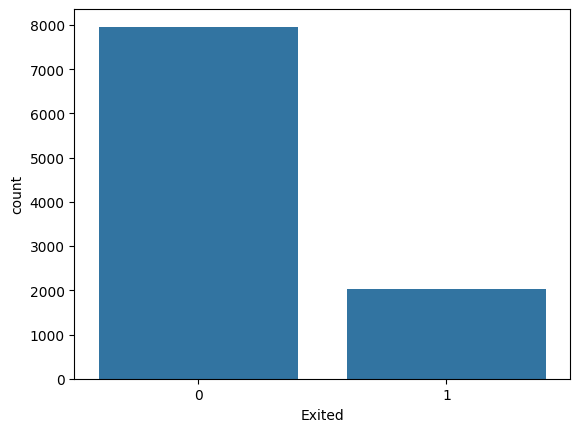

In [ ]:
print(data.info())
print(data.describe())

sns.countplot(x='Exited', data=data)
plt.show()


now lets perform data proccessing with these metrics.

primarily we'll handle missing datas by calculating the percentage of missing data and removing columns with more than 30% of missing data.


In [ ]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

print(missing_data)

threshold = 30
columns_to_drop = missing_percentage[missing_percentage > threshold].index
data = data.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")

                 Missing Values  Percentage
RowNumber                     0         0.0
CustomerId                    0         0.0
Surname                       0         0.0
CreditScore                   0         0.0
Geography                     0         0.0
Gender                        0         0.0
Age                           0         0.0
Tenure                        0         0.0
Balance                       0         0.0
NumOfProducts                 0         0.0
HasCrCard                     0         0.0
IsActiveMember                0         0.0
EstimatedSalary               0         0.0
Exited                        0         0.0
Dropped columns: Index([], dtype='object')


as there are no missing data no further actions are required.

Now we have to convert non-int datas to int datatype

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder , StandardScaler
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Male=1, Female=0

data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

lets standardize the numerical datas so that the standard deviation becomes 1 and  mean turns 0

In [ ]:
numeric_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])
print(data.dtypes)

RowNumber              int64
CustomerId             int64
Surname               object
CreditScore          float64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
dtype: object


convert the true false characters in bool value to int datatype and remove the surname column as it does not have any significance in prediction of output

In [ ]:
data['Geography_Germany'] = data['Geography_Germany'].astype(int)
data['Geography_Spain'] = data['Geography_Spain'].astype(int)

data.drop('Surname', axis=1, inplace=True)

lets visualise the data using a correlation Heatmap

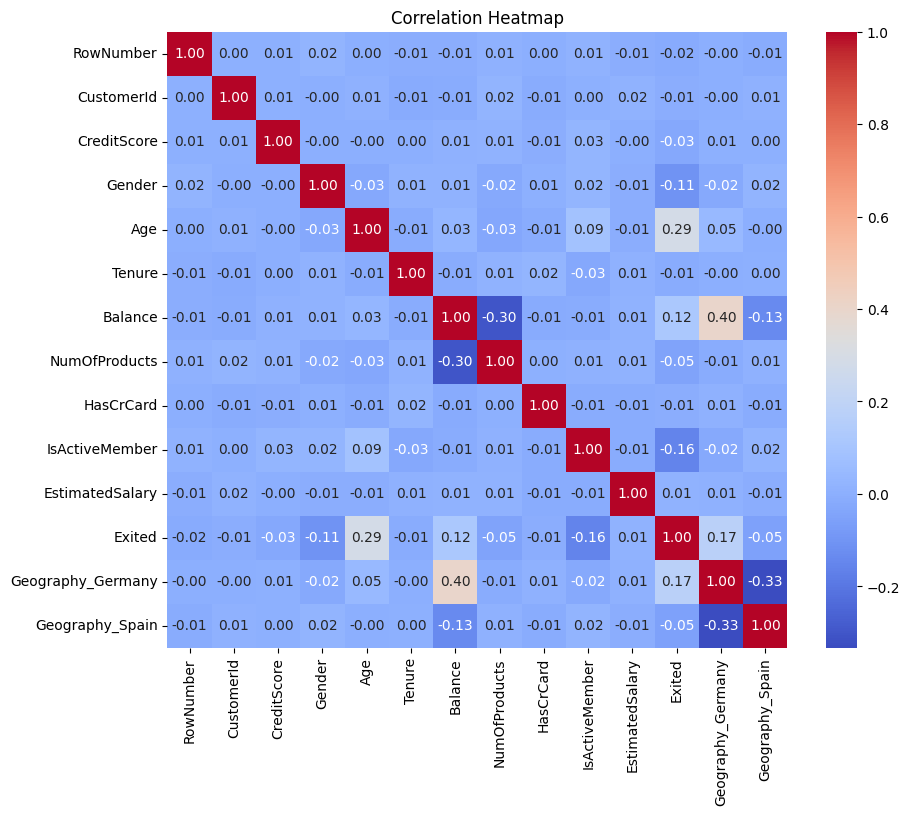

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

As our data is preprocessed with simple conditions we can now split the data to train and test.(we can also preprocess the data by adding any additional numeric attributes to improve the model performance and remove imbalanced data if majority data works for or against our target variable.)

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

we can use the train split data to build our model by choosing a suitable model. Some of the suitable ml models for this classification problem are logistic regression, decision tree, Support vector machines and Random forest classifiers, etc. Here we are using random forest classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

the following code share the most important features for predicting the expected output and it is represented in a bar graph in decending order

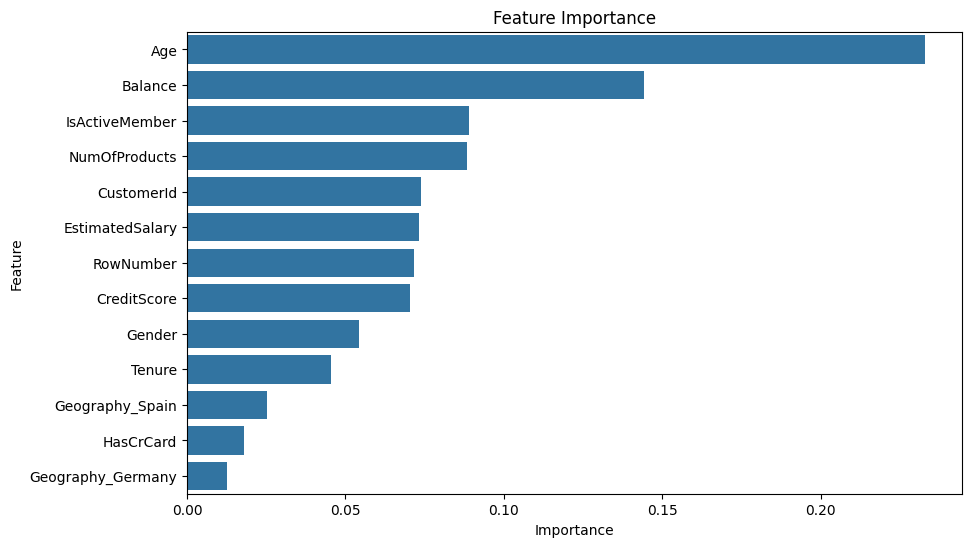

In [ ]:
importances = classifier.feature_importances_
features = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

lets make predictions and evaluation of the processed model after importing the required libraries

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix,"\n")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 83.00%

Confusion Matrix:
[[1424  169]
 [ 171  236]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1593
           1       0.58      0.58      0.58       407

    accuracy                           0.83      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.83      0.83      0.83      2000



visualisation of confusion matrix in a heatmap

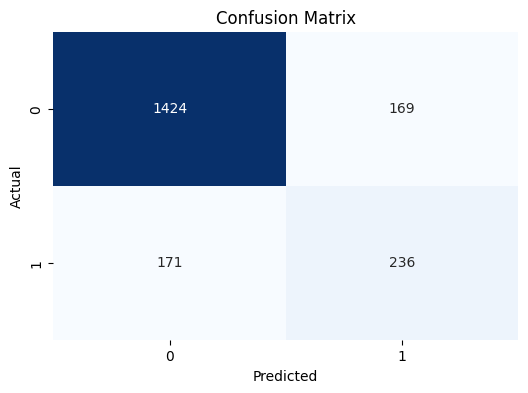

In [ ]:
y_pred = classifier.predict(X_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()